In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import importlib
import attrs

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline

In [3]:
X, y = attrs.dataset_loader()

In [4]:
X.shape

(27558, 625)

Text(0.5, 1.0, 'Parasitized')

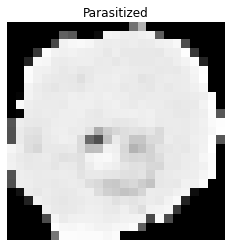

In [5]:
plt.imshow(X[y == 1][0].reshape(25,25), cmap="gray")
plt.axis("off")
plt.title("Parasitized")

Text(0.5, 1.0, 'Not Parasitized')

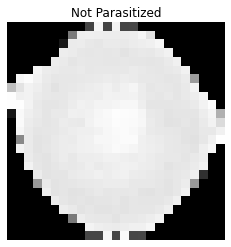

In [6]:
plt.imshow(X[y == 0][0].reshape(25,25), cmap="gray")
plt.axis("off")
plt.title("Not Parasitized")

e:\Program files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

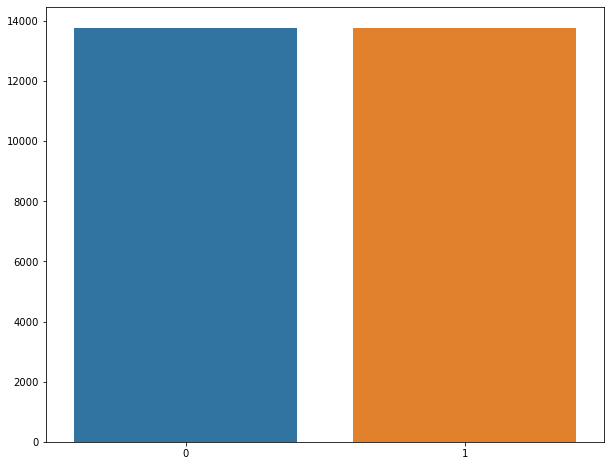

In [7]:
unique, count = np.unique(y, return_counts=True)
plt.figure(figsize=(10,8))
sns.barplot(unique, y=count)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (19290, 625)
x_test shape:  (8268, 625)
y_train shape:  (19290,)
y_test shape:  (8268,)


In [13]:
# using random forest classifer is like using svm like this: svc_clf = SVC(C=1000, kernel="rbf", gamma=0.1)
# I removed it cuz, it take a very long time to train and check for cross validation.
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=24, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=24, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [14]:
rnd_scores = attrs.cross_val_score(rnd_clf, X_train, y_train, n=15)
attrs.display_cross_val_score(rnd_scores)

Scores:  [0.72472784 0.72472784 0.718507   0.72706065 0.71772939 0.7192846
 0.70917574 0.70995334 0.718507   0.7192846  0.73250389 0.718507
 0.72939347 0.70451011 0.73172628]
Mean:  0.7203732503888024
Standard deviation:  0.007939190680000123


In [11]:
importlib.reload(attrs)

<module 'attrs' from 'd:\\Machine learning\\Projects\\Malaria Cell Predictor\\attrs.py'>